# Plot flow cytometry of delivery of two fluorescent protein mRNAs (mCherry and BFP)

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_two_color"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
# Set input files
samples_infiles = {"mCh_alone": "../preprocessed_data/flow_data/flow_two_color_mCh_alone.csv",
                   "BFP_alone": "../preprocessed_data/flow_data/flow_two_color_BFP_alone.csv",
                   "mCh_BFP": "../preprocessed_data/flow_data/flow_two_color_mCh_BFP.csv",
                   "No_DNA": "../preprocessed_data/flow_data/flow_two_color_no_DNA.csv"}

In [5]:
# Load events and concatenate into one dataframe

dfs_temp = []

for sample, infile in samples_infiles.items():
    
    df_temp = pd.read_csv(infile, index_col=None)
    df_temp["Sample"] = sample
    
    print("Sample:", sample, "-- Loaded", df_temp.shape[0], "events")
    
    dfs_temp.append(df_temp)

df_raw = pd.concat(dfs_temp)

print(df_raw.shape)
df_raw.head()

Sample: mCh_alone -- Loaded 12806 events
Sample: BFP_alone -- Loaded 18359 events
Sample: mCh_BFP -- Loaded 19270 events
Sample: No_DNA -- Loaded 19612 events
(70047, 33)


,FSC-A,FSC-H,FSC-Width,SSC-A,SSC-H,GFP-A,GFP-H,PE-A,PE-H,mCherry-A,mCherry-H,PC5.5-A,PC5.5-H,PC7-A,PC7-H,PerCP-A,PerCP-H,APC-A,APC-H,APC-A700-A,APC-A700-H,APC-A750-A,APC-A750-H,PB450-A,PB450-H,KO525-A,KO525-H,Violet610-A,Violet610-H,Violet660-A,Violet660-H,Time,Sample
0,270231.0,199057,1390.14,181506.0,125575,858.1,917.4,451.1,897.4,7787.4,4880.9,15400.0,9788.8,2965.5,2016.2,3265.9,2680.3,7.5,388.6,180.4,327.1,280.8,356.0,594.6,526.8,1740.1,1406.6,2533.7,1894.6,556.3,495.4,0.211027,mCh_alone
1,306505.0,240972,1302.50,259855.0,153377,886.8,1016.4,-81.1,775.3,15004.5,8586.6,29579.2,16358.6,5472.1,3501.1,9793.0,5386.4,1092.0,772.8,879.3,683.3,735.5,492.8,515.7,683.7,3335.5,2035.4,4495.8,2691.1,921.8,824.0,0.219109,mCh_alone
2,345752.0,245112,1444.44,192390.0,133518,540.4,1096.8,803.1,1135.1,13748.3,8619.8,26551.6,16818.7,4861.4,3137.3,7517.3,5258.9,706.8,540.4,425.1,664.9,447.7,488.4,563.8,696.5,2800.5,2230.4,3779.7,2715.2,988.4,858.9,0.228127,mCh_alone
3,367634.0,289916,1298.52,433096.0,278395,1530.1,1628.4,1464.9,1133.0,35384.9,22425.4,68474.3,42213.8,13192.2,7763.4,19446.2,12114.8,852.9,870.2,640.2,738.2,563.5,658.6,536.6,515.8,3877.4,2973.5,8039.2,4844.1,1964.5,1537.4,0.245008,mCh_alone
4,272214.0,269056,1036.02,587060.0,277261,4474.0,2419.0,1678.9,2020.5,47542.9,22124.9,89959.9,42444.4,17787.9,7954.5,30335.1,14814.8,1491.3,791.9,1500.6,775.7,1055.3,875.6,470.4,536.3,6680.5,3526.8,13679.0,6546.0,2993.9,1838.6,0.256621,mCh_alone


# Preprocess data

In [6]:
# Log transform
df_raw["log10 mCherry-A"] = np.log10(df_raw["mCherry-A"])
df_raw["log10 PB450-A"] = np.log10(df_raw["PB450-A"])

/scratch/resources/anaconda3/envs/RNA_export_magic/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch/resources/anaconda3/envs/RNA_export_magic/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Plot delivery and expression of two fluorescent protein mRNAs

In [7]:
# Define plot function

def plot_scatter(ax=None, data=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(1.25, 1.25))
    else:
        fig = None
        
    sns.histplot(ax=ax, data=data,
                 x="log10 mCherry-A",
                 y="log10 PB450-A",
                 bins=(np.linspace(0,7,100), np.linspace(0,7,100)),
                 stat="probability",
                 cmap="viridis",
                 cbar=False,
                 vmin=0, vmax=0.02)

    ax.set_xlim(2,5)
    ax.set_ylim(2,5)

    ax.set_xticks([2, 3, 4, 5])
    xticklabels = [r"$10^2$", r"$10^3$", r"$10^4$", r"$10^5$"]
    ax.set_xticklabels(xticklabels)

    ax.set_yticks([2, 3, 4, 5])
    yticklabels = [r"$10^2$", r"$10^3$", r"$10^4$", r"$10^5$"]
    ax.set_yticklabels(yticklabels)

    ax.set_xlabel("Cargo 1 expression\n(mCherry) (a.u.)")
    ax.set_ylabel("Cargo 2 expression\n(BFP) (a.u.)")
    
    ax.add_patch(mpl.patches.Rectangle((np.log10(1500), np.log10(1000)), 5, 5, fill=None, edgecolor="k", lw=0.5))
    
    return fig, ax

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


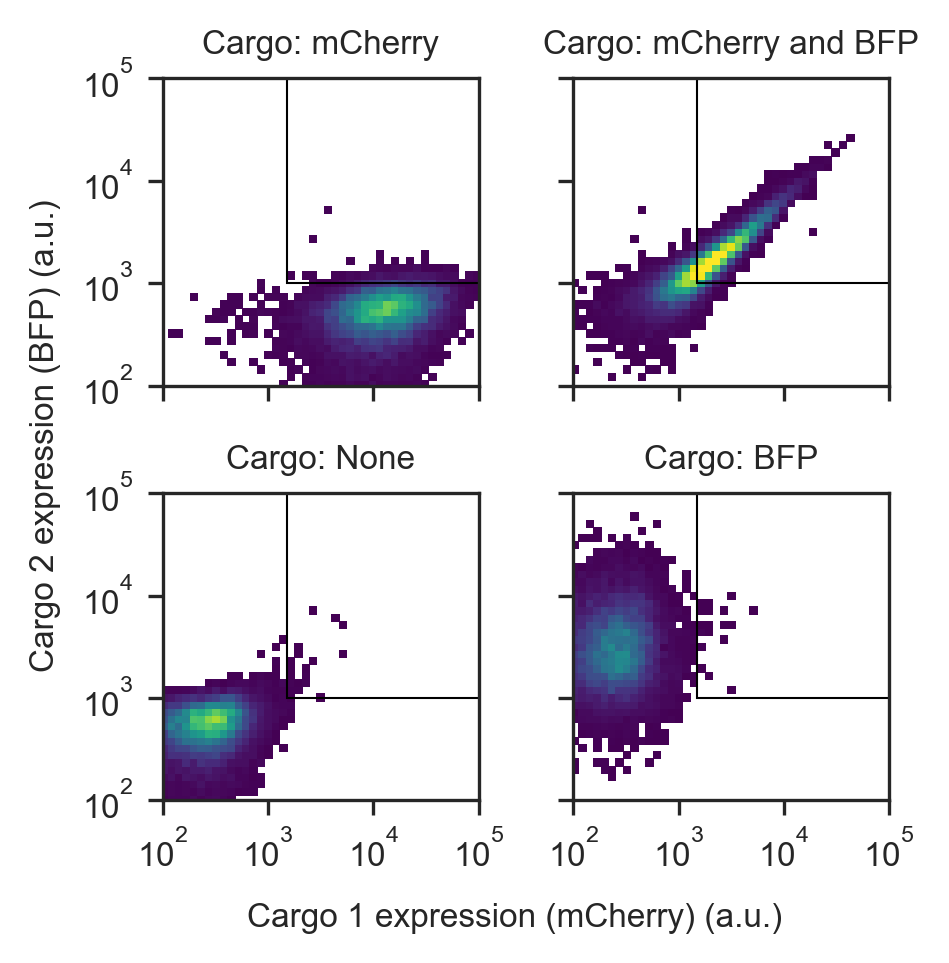

In [8]:
fig, axes = plt.subplots(2,2, figsize=(1.25*2.5, 1.25*2.5), sharex=True, sharey=True)


ax = axes[0,1]
selector = df_raw["Sample"] == "mCh_BFP"
data = df_raw.loc[selector]
plot_scatter(ax=ax, data=data)
ax.set_title("Cargo: mCherry and BFP")


ax = axes[0,0]
selector = df_raw["Sample"] == "mCh_alone"
data = df_raw.loc[selector]
plot_scatter(ax=ax, data=data)
ax.set_title("Cargo: mCherry")


ax = axes[1,1]
selector = df_raw["Sample"] == "BFP_alone"
data = df_raw.loc[selector]
plot_scatter(ax=ax, data=data)
ax.set_title("Cargo: BFP")


ax = axes[1,0]
selector = df_raw["Sample"] == "No_DNA"
data = df_raw.loc[selector]
plot_scatter(ax=ax, data=data)
ax.set_title("Cargo: None")


for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("")
    
fig.text(0., 0.5, "Cargo 2 expression (BFP) (a.u.)", ha="center", va="center", rotation=90)
fig.text(0.5, -0.015, "Cargo 1 expression (mCherry) (a.u.)", ha="center", va="center")

plt.subplots_adjust(wspace=0.3, hspace=0.35)

save_figure(fig, "hist2d_mCh_BFP_subplots2x2")

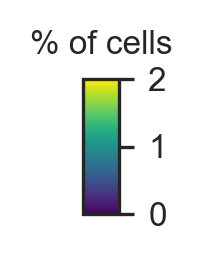

In [9]:
# Plot colorbar

a = np.array([[0,1]])

fig = plt.figure(figsize=(0.15,0.75))

img = plt.imshow(a, cmap="viridis", vmin=0, vmax=0.02)
plt.gca().set_visible(False)

cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="vertical", cax=cax)

cbar.set_ticks([0, 0.01, 0.02])
cbar.set_ticklabels([0, 1, 2])

cax.set_title("% of cells")

save_figure(fig, "cbar_density")

# Report statistics

In [10]:
def print_report(df, sample):

    print(sample)

    selector = df_raw["Sample"] == sample
    data = df_raw.loc[selector]
    print(data.shape)

    selector2 = (data["mCherry-A"] > 1500) & (data["PB450-A"] > 1000)
    data_mChPos_BFPPos = data.loc[selector2]
    print(data_mChPos_BFPPos.shape)

    frac_mChPos_BFPPos = data_mChPos_BFPPos.shape[0] / data.shape[0]

    print()
    print("n =", data.shape[0], "cells")
    print("mCh+ BFP+:", frac_mChPos_BFPPos*100, "%")
    print("")


In [11]:
sample = "mCh_BFP"
print_report(df_raw, sample)

mCh_BFP
(19270, 35)
(11544, 35)

n = 19270 cells
mCh+ BFP+: 59.90659055526726 %



In [12]:
sample = "mCh_alone"
print_report(df_raw, sample)

mCh_alone
(12806, 35)
(425, 35)

n = 12806 cells
mCh+ BFP+: 3.3187568327346555 %



In [13]:
sample = "BFP_alone"
print_report(df_raw, sample)

BFP_alone
(18359, 35)
(22, 35)

n = 18359 cells
mCh+ BFP+: 0.11983223487118035 %



In [14]:
sample = "No_DNA"
print_report(df_raw, sample)

No_DNA
(19612, 35)
(27, 35)

n = 19612 cells
mCh+ BFP+: 0.13767081378747706 %

